# Statistiques sur le COVID-19

Le fichier `data_exo_1.dat` contient trois colonnes : la première est la date, la seconde le nombre cumulé de décès en hôpital liés au COVID-19 et la troisième le nombre cumulé de décès en EHPAD liés au COVID-19.

Le fichier commence le lundi 2 mars 2020. C'est l'origine de nos dates (jour 0). Dans la suite, on entend par date ou numéro du jour le nombre de jours écoulés depuis le 2 mars 2020. Ce fichier a été extrait de la base de donnée en janvier 2020 (il ne comprend donc que la première et début de la deuxième vague).

* Lire ce fichier à l'aide de la commande loadtxt, et extraire les trois colones dans trois variables.

In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
date, deces_hopital, deces_ehpad = np.loadtxt('data_exo_1.dat', unpack=True)

* Tracer le graphe du nombre de décès cumulé en hôpital et en EHPAD en fonction de la date.

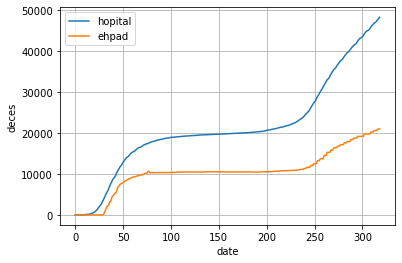

In [3]:
plt.plot(date, deces_hopital, label="hopital")
plt.plot(date, deces_ehpad, label="ehpad")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Ajouter sur le même graph le nombre totoal de décés cumulé

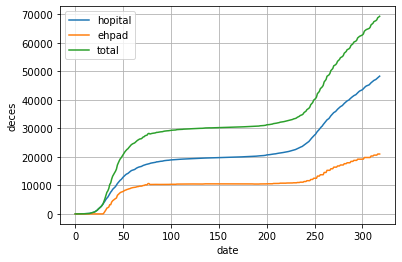

In [4]:
plt.plot(date, deces_hopital, label="hopital")
plt.plot(date, deces_ehpad, label="ehpad")
plt.plot(date, deces_hopital + deces_ehpad, label="total")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Au cours des 30 premiers jours, le nombre cumulé de décès en hôpital suit une loi proche d'une exponentielle. Tracer cette courbe en échelle semi-logarithmique.

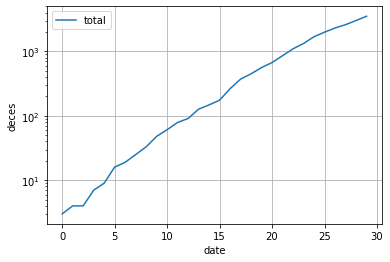

In [5]:
plt.semilogy(date[:30], deces_hopital[:30], label="total")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Au cours de ces 30 premiers jours, le nombre de décès peut s'écrire $N(j) = N_0(1+a)^{j-j_0}$. Tracer cette courbe avec les paramètres pour lesquels elle s'ajuste bien à l'œil. Quelle est la valeur de $a$? (Nous ne demandons pas dans cette question de faire un ajustement, mais simplement de superposer les deux courbes).

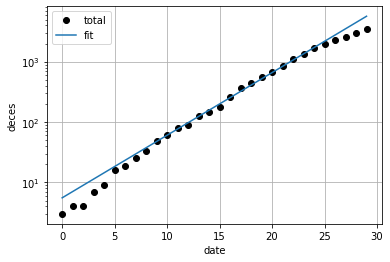

In [6]:
plt.semilogy(date[:30], deces_hopital[:30], "ok", label="total")

N0 = 200
j0 = 15
a = 0.27
j = np.arange(30)

plt.plot(j, N0*(1+a)**(j-j0), label="fit")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Calculer le tableau du nombre quotidien de décès en hôpital et en EHPAD en fonction de la date. Et tracer la courbe pour l'hôpital. (Remarque, il est possible de faire cette opération sans boucle )

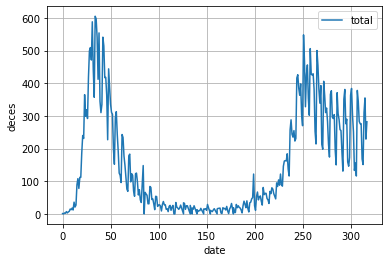

In [7]:
deces_quot_hopital = deces_hopital[1:] - deces_hopital[:-1]
date_quot = date[:-1]

plt.plot(date_quot, deces_quot_hopital, label="total")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Quel jour a connu le plus grand nombre de décès en hôpital ? (on utilisera la fonction `argmax`)

In [8]:
max(deces_quot_hopital)
argmax(deces_quot_hopital)

34

* Combien de jours ont connu plus de 50 décés en EHPAD ?

In [9]:
np.sum(deces_quot_hopital>50)

185

* Comment extraire en une ligne le nombre de décés pour un jour donné ?

In [10]:
np.sum(deces_quot_hopital[5::7])

4245.0

* Calculer et tracer le nombre total de décès en hôpital par jour de la semaine. Pour quel jour de la semaine enregistre-t-on le moins de décès ?

In [11]:
list_result=[]

for jour in range(7):
    res = np.sum(deces_quot_hopital[jour::7])
    list_result.append(res)
    
list_result    

[8778.0, 7444.0, 7209.0, 6957.0, 5220.0, 4245.0, 8454.0]

Text(0, 0.5, 'deces')

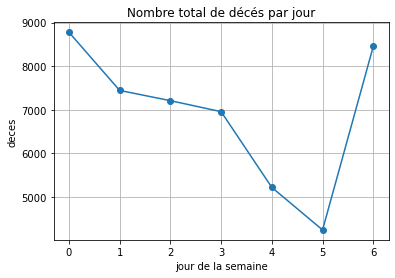

In [12]:
plt.plot(list_result, 'o-')

plt.grid()
plt.title("Nombre total de décés par jour")
plt.xlabel("jour de la semaine")
plt.ylabel("deces")